# PRACTICAL NO. 1
# DATA WRANGLING I

Perform the following operations using Python on dataset(e.g., employee.csv)
1. Import all the required Python Libraries. And Load the Dataset into pandas data frame.
2. Data Preprocessing: find the missing values in the data columnwise and display statistical information.
3. Provide variable descriptions. Types of variables etc.Check the dimensions of the data frame.
4. Data Formatting Summarize the types of variables by checking the data types (i.e., character, numeric, integer, factor, and logical) of the variables in the data set. If variables are not in the correct data type, apply proper type conversions.
5. Data Normalization:Perform Z-Score transformation and plot box plot for any column.
6. Turn categorical variables into quantitative variables in Python.

# **1**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('datasets/Employee.csv')

In [14]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


# **2**

In [15]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [16]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


# **3**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [18]:
df.dtypes

Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object

In [19]:
df.ndim

2

In [20]:
df.shape

(4653, 9)

# **4**

In [21]:
# JoiningYear is in int64 format, we can convert it to date(year) datatype
pd.to_datetime(df['JoiningYear'],format='%Y')

0      2017-01-01
1      2013-01-01
2      2014-01-01
3      2016-01-01
4      2017-01-01
          ...    
4648   2013-01-01
4649   2013-01-01
4650   2018-01-01
4651   2012-01-01
4652   2015-01-01
Name: JoiningYear, Length: 4653, dtype: datetime64[ns]

In [22]:
# we can only have year, if we dont want the joining year (but datatype here is int32)
pd.to_datetime(df['JoiningYear']).dt.year

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
4648    1970
4649    1970
4650    1970
4651    1970
4652    1970
Name: JoiningYear, Length: 4653, dtype: int32

# **5**

In [23]:
# lets perform Z-transform for age
df['z-score'] = (df['Age'] - df['Age'].mean())/ df['Age'].std()

In [24]:
df['z-score'].head()

0    0.954543
1   -0.288701
2    1.783371
3   -0.495908
4   -1.117530
Name: z-score, dtype: float64

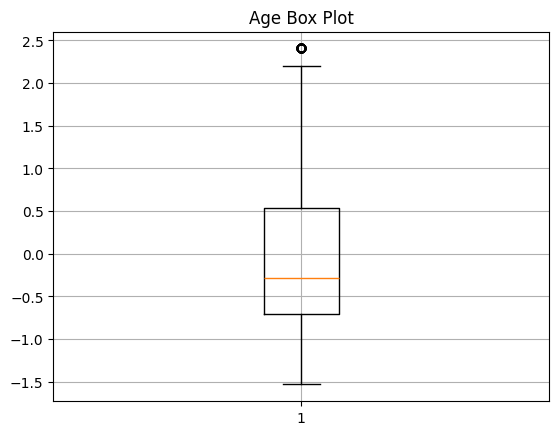

In [25]:
plt.boxplot(df['z-score'])
plt.title('Age Box Plot')
plt.grid(True)
plt.show()

# **6**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4653 non-null   object 
 1   JoiningYear                4653 non-null   int64  
 2   City                       4653 non-null   object 
 3   PaymentTier                4653 non-null   int64  
 4   Age                        4653 non-null   int64  
 5   Gender                     4653 non-null   object 
 6   EverBenched                4653 non-null   object 
 7   ExperienceInCurrentDomain  4653 non-null   int64  
 8   LeaveOrNot                 4653 non-null   int64  
 9   z-score                    4653 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 363.6+ KB


In [27]:
df['Education'].unique(), df['City'].unique(), df['Gender'].unique(), df['EverBenched'].unique()

(array(['Bachelors', 'Masters', 'PHD'], dtype=object),
 array(['Bangalore', 'Pune', 'New Delhi'], dtype=object),
 array(['Male', 'Female'], dtype=object),
 array(['No', 'Yes'], dtype=object))

### perform on any one of the data column

## Manual Mapping

In [28]:
mapping = {'Male':0, 'Female':1}
df['Gender'] = df['Gender'].map(mapping)

In [29]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,z-score
0,Bachelors,2017,Bangalore,3,34,0,No,0,0,0.954543
1,Bachelors,2013,Pune,1,28,1,No,3,1,-0.288701
2,Bachelors,2014,New Delhi,3,38,1,No,2,0,1.783371
3,Masters,2016,Bangalore,3,27,0,No,5,1,-0.495908
4,Masters,2017,Pune,3,24,0,Yes,2,1,-1.117530
